# GAN 실험해보기
- Pytorch로 GAN 구조를 짜보고, MNIST digit으로 학습하여, gan 의 generator 가 제대로 동작하는지 확인해보겠습니다.

### 1. Imports

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

from generator import Generator
from discriminator import Discriminator
from train import train_model

import matplotlib.pyplot as plt

# device setting for gpu users
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device: ", device)
torch.backends.cudnn.enabled = False

device:  cuda


### 2. Data Preparation
MNIST digit data 를 활용하겠습니다.

In [2]:
epochs = 300
batch_size = 128
z_dim = 100

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize(
                                   mean=(0.5,),
                                   std=(0.5,))])

mnist_dataset = datasets.MNIST(root='./data/', train=True, transform=transform, download=True)

dataloader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

### 3. Modeling
깔끔한 노트북을 위해, `discriminator.py` 와 `generator.py` 에 각 Discriminator 와 Generator를 정의해 두었습니다. 이 노트북에서는 초기화 선언만 하겠습니다.

In [3]:
generator = Generator(latent_dims=z_dim).to(device)
discriminator = Discriminator().to(device)
print("GENERATOR : ", generator)
print("DISCRIMINATOR : ", discriminator)

GENERATOR :  Generator(
  (fc1): Linear(in_features=100, out_features=128, bias=True)
  (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (fc2_bn): BatchNorm1d(256, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=512, bias=True)
  (fc3_bn): BatchNorm1d(512, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=512, out_features=1024, bias=True)
  (fc4_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=1024, out_features=784, bias=True)
)
DISCRIMINATOR :  Discriminator(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


### 4. Train
#### 4-1. Loss & Optimizer
- GAN 의 구조에서부터 알 수 있듯이, 지금 네트워크는 discriminator 가 generator 로 부터 받은 생성된 사진과 실제 사진이 각각 진짜인지, 가짜인지 맞추는 loss 로 부터 역전파 되어 각 구조가 학습하게 됩니다. 따라서 discriminator 의 마지막 layer의 크기와 Bincary Cross Entropy Loss 가 구조로부터 정해지게 됩니다.
- Optimizer 의 경우, 우리는 discriminator 와 generator 가 순차적으로 학습하는 구조를 가질 수 밖에 없습니다. 따라서, 각 구조를 update 시켜주기위한 optimizer 는 따로 선언해 줍니다.

In [4]:
# Loss & Optimizer
criterion = nn.BCELoss()
generator_optim = optim.Adam(generator.parameters(), lr=0.0002, weight_decay=8e-9)
discriminator_optim = optim.Adam(discriminator.parameters(), lr=0.0002, weight_decay=8e-9)

#### 4-2. Train Model
- discriminator 의 학습을 위해 train 단계에서, 진짜(1)와 가짜(0) 이미지의 label을 붙여줍니다.

EPOCH 0: BATCH: 467, discrim_loss: 0.4104176461696625, generator_loss: 1.9267303943634033


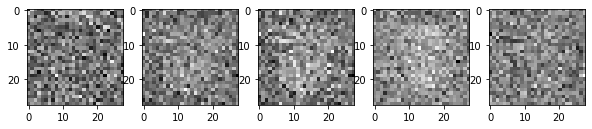

EPOCH 20: BATCH: 467, discrim_loss: 1.935034155845642, generator_loss: 1.1694395542144775


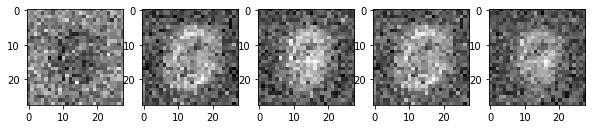

EPOCH 40: BATCH: 467, discrim_loss: 1.2191517353057861, generator_loss: 1.3885111808776855


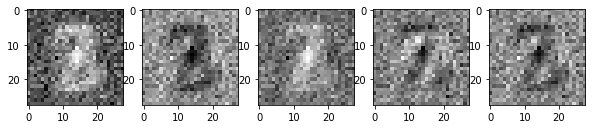

EPOCH 60: BATCH: 467, discrim_loss: 1.0112518072128296, generator_loss: 1.693368911743164


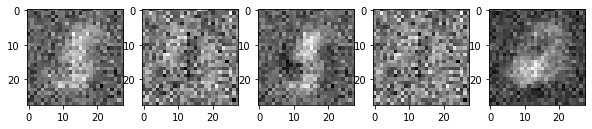

EPOCH 80: BATCH: 467, discrim_loss: 1.4653241634368896, generator_loss: 1.096383810043335


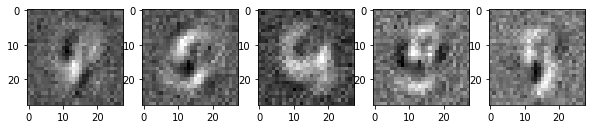

EPOCH 100: BATCH: 467, discrim_loss: 1.1906931400299072, generator_loss: 1.0233558416366577


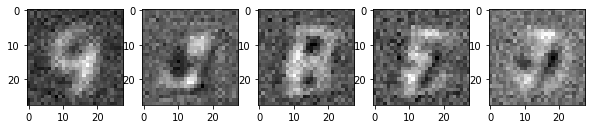

EPOCH 120: BATCH: 467, discrim_loss: 1.254490613937378, generator_loss: 0.9767846465110779


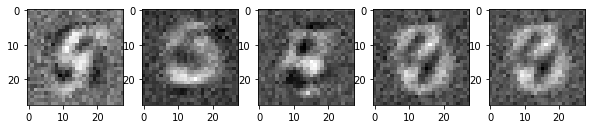

EPOCH 140: BATCH: 467, discrim_loss: 1.2153103351593018, generator_loss: 1.2973246574401855


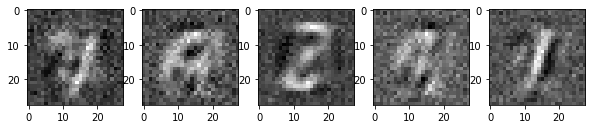

EPOCH 160: BATCH: 467, discrim_loss: 1.3304193019866943, generator_loss: 0.8257005214691162


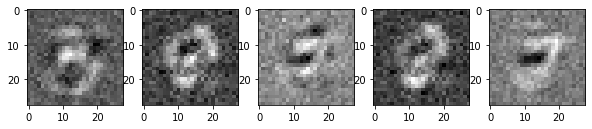

EPOCH 180: BATCH: 467, discrim_loss: 1.012265920639038, generator_loss: 1.3369818925857544


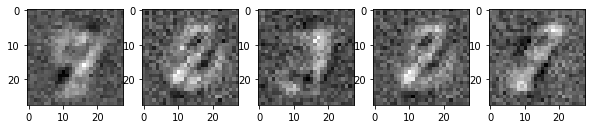

EPOCH 200: BATCH: 467, discrim_loss: 1.1967308521270752, generator_loss: 1.4550223350524902


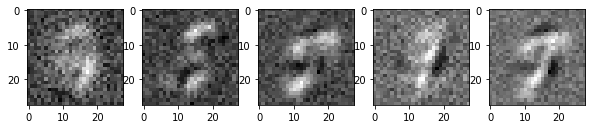

EPOCH 220: BATCH: 467, discrim_loss: 1.3155533075332642, generator_loss: 1.173822045326233


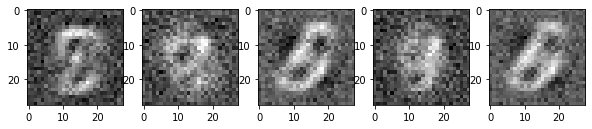

EPOCH 240: BATCH: 467, discrim_loss: 1.3403130769729614, generator_loss: 1.1573419570922852


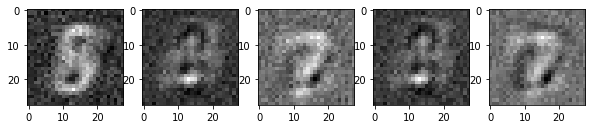

EPOCH 260: BATCH: 467, discrim_loss: 1.5071141719818115, generator_loss: 2.260043144226074


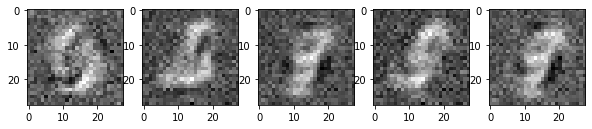

EPOCH 280: BATCH: 467, discrim_loss: 1.332573652267456, generator_loss: 0.7387592196464539


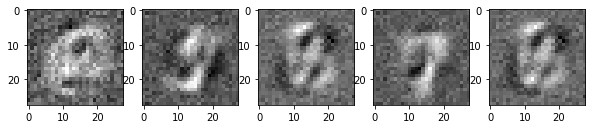

(Discriminator(
   (fc1): Linear(in_features=784, out_features=256, bias=True)
   (fc2): Linear(in_features=256, out_features=128, bias=True)
   (fc3): Linear(in_features=128, out_features=1, bias=True)
 ), Generator(
   (fc1): Linear(in_features=100, out_features=128, bias=True)
   (fc1_bn): BatchNorm1d(128, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc2): Linear(in_features=128, out_features=256, bias=True)
   (fc2_bn): BatchNorm1d(256, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc3): Linear(in_features=256, out_features=512, bias=True)
   (fc3_bn): BatchNorm1d(512, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc4): Linear(in_features=512, out_features=1024, bias=True)
   (fc4_bn): BatchNorm1d(1024, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
   (fc5): Linear(in_features=1024, out_features=784, bias=True)
 ))

In [5]:
train_model(z_dim, discriminator, generator, batch_size, discriminator_optim, generator_optim, criterion, dataloader, epochs, device)